## 2.9 Adding Realtime metric to Training in Tensorflow

We will be using Linear Regression example and moniter its metric in Tensorflow

In [1]:
import numpy as np
x = np.random.random((1000,))
y = x+0.1*np.random.random((1000,))

In [2]:
import matplotlib.pyplot as plt;

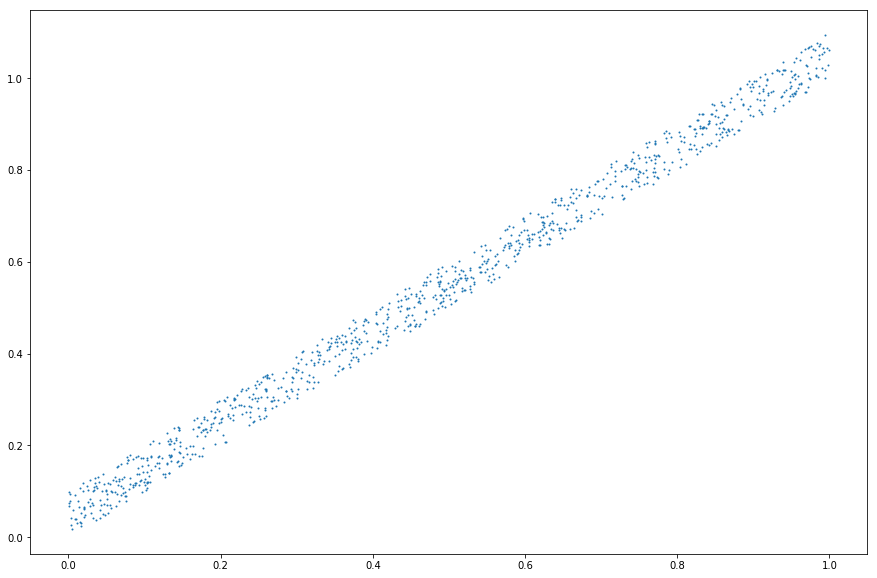

In [3]:
plt.figure(figsize=(15,10))
plt.scatter(x,y,s=1)

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
trainx,testx,trainy,testy = train_test_split(x,y)

In [6]:
# Model Definition
import tensorflow as tf;
x = tf.placeholder(name='x',shape=[None],dtype=tf.float32)
y = tf.placeholder(name='y',shape=[None],dtype=tf.float32)
m = tf.get_variable(name='slope',shape=(),dtype=tf.float32,initializer=tf.random_normal_initializer)
c = tf.get_variable(name='intercept',shape=(),dtype=tf.float32,initializer=tf.random_normal_initializer)

In [7]:
with tf.name_scope('prediction'):
    y_hat = m*x+c
with tf.name_scope('loss'):
    loss = tf.losses.mean_squared_error(y_hat,y)
print (loss.name)
tf.summary.scalar('loss',loss)
tf.summary.histogram('slope_hist',m)
tf.summary.histogram('intercept_hist',c)

loss/mean_squared_error/value:0


<tf.Tensor 'intercept_hist:0' shape=() dtype=string>

In [8]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(loss=loss)
merged = tf.summary.merge_all()
initializer = tf.global_variables_initializer()

In [9]:

with tf.Session() as sess:
    initializer.run()
    for i in range(1000):
        _,_train_loss = sess.run([optimizer, loss],feed_dict={x:trainx,y:trainy})
        if(i%100==0):
            print ('loss=%2.6f,m=%2.2f,c=%2.2f'%(_train_loss,m.eval(),c.eval()))

loss=0.198329,m=1.77,c=0.00
loss=0.009538,m=1.31,c=-0.12
loss=0.003056,m=1.16,c=-0.03
loss=0.001377,m=1.08,c=0.01
loss=0.000942,m=1.04,c=0.03
loss=0.000829,m=1.02,c=0.04
loss=0.000800,m=1.01,c=0.05
loss=0.000793,m=1.00,c=0.05
loss=0.000791,m=1.00,c=0.05
loss=0.000790,m=1.00,c=0.05


In [11]:
train_writer = tf.summary.FileWriter('model/2.9.1-exp/train',sess.graph)
test_writer = tf.summary.FileWriter('model/2.9.1-exp/test')
with tf.Session() as sess:
    initializer.run()
    for i in range(1000):
        _,_train_loss,summary = sess.run([optimizer, loss,merged],feed_dict={x:trainx,y:trainy})
        train_writer.add_summary(summary,i)
        if(i%10==0):
            _test_loss,summary = sess.run([loss,merged],feed_dict={x:testx,y:testy})
            test_writer.add_summary(summary,i)
            print ('train loss=%2.6f, test loss = %2.6f, m=%2.2f, c=%2.2f'%(_train_loss,_test_loss,m.eval(),c.eval()))


train loss=0.047814, test loss = 0.045835, m=0.29, c=0.36
train loss=0.036682, test loss = 0.038975, m=0.35, c=0.37
train loss=0.031797, test loss = 0.034597, m=0.40, c=0.36
train loss=0.027856, test loss = 0.030535, m=0.44, c=0.35
train loss=0.024434, test loss = 0.026882, m=0.48, c=0.33
train loss=0.021447, test loss = 0.023660, m=0.51, c=0.31
train loss=0.018837, test loss = 0.020833, m=0.54, c=0.29
train loss=0.016557, test loss = 0.018358, m=0.57, c=0.28
train loss=0.014565, test loss = 0.016192, m=0.60, c=0.26
train loss=0.012824, test loss = 0.014296, m=0.63, c=0.25
train loss=0.011304, test loss = 0.012637, m=0.65, c=0.24
train loss=0.009975, test loss = 0.011184, m=0.67, c=0.22
train loss=0.008815, test loss = 0.009912, m=0.70, c=0.21
train loss=0.007801, test loss = 0.008798, m=0.71, c=0.20
train loss=0.006915, test loss = 0.007822, m=0.73, c=0.19
train loss=0.006141, test loss = 0.006967, m=0.75, c=0.18
train loss=0.005465, test loss = 0.006218, m=0.77, c=0.17
train loss=0.0